# Multi-sample analysis

In [1]:
import os
os.chdir("..")
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from spatools.tools.tl import correlate_distances

adata = sc.read(os.path.join(os.getcwd(), "data", "scvi_non_5000_unique.h5ad"))
adata = correlate_distances(adata, is_concatenated=True, cluster_col="clusters_0.6", batch_key="batch")

In [4]:
type(adata.obsm["spatial"])

numpy.ndarray

In [5]:
from spatools.tools.tl import z_score

adata.uns["spatools"]["response"] = adata.uns["spatools"]["batch"].str.split("_").str[1]

adata = z_score(adata, filter_column="response", filter_value="GOR")

/media/SATA/spatools/spatools/tools/tl.py:536: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  
/media/SATA/spatools/spatools/tools/tl.py:536: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  
/media/SATA/spatools/spatools/tools/tl.py:536: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  
/media/SATA/spatools/spatools/tools/tl.py:536: FutureWarni

In [6]:
adata.uns_keys()

['check_distances',
 'check_spots',
 'clusters_0.6_colors',
 'hvg',
 'log1p',
 'neighbors',
 'pca',
 'pearson_residuals_normalization',
 'response_colors',
 'spatial',
 'spatools',
 't-test',
 'umap',
 'z-score',
 'zscore_matrix']

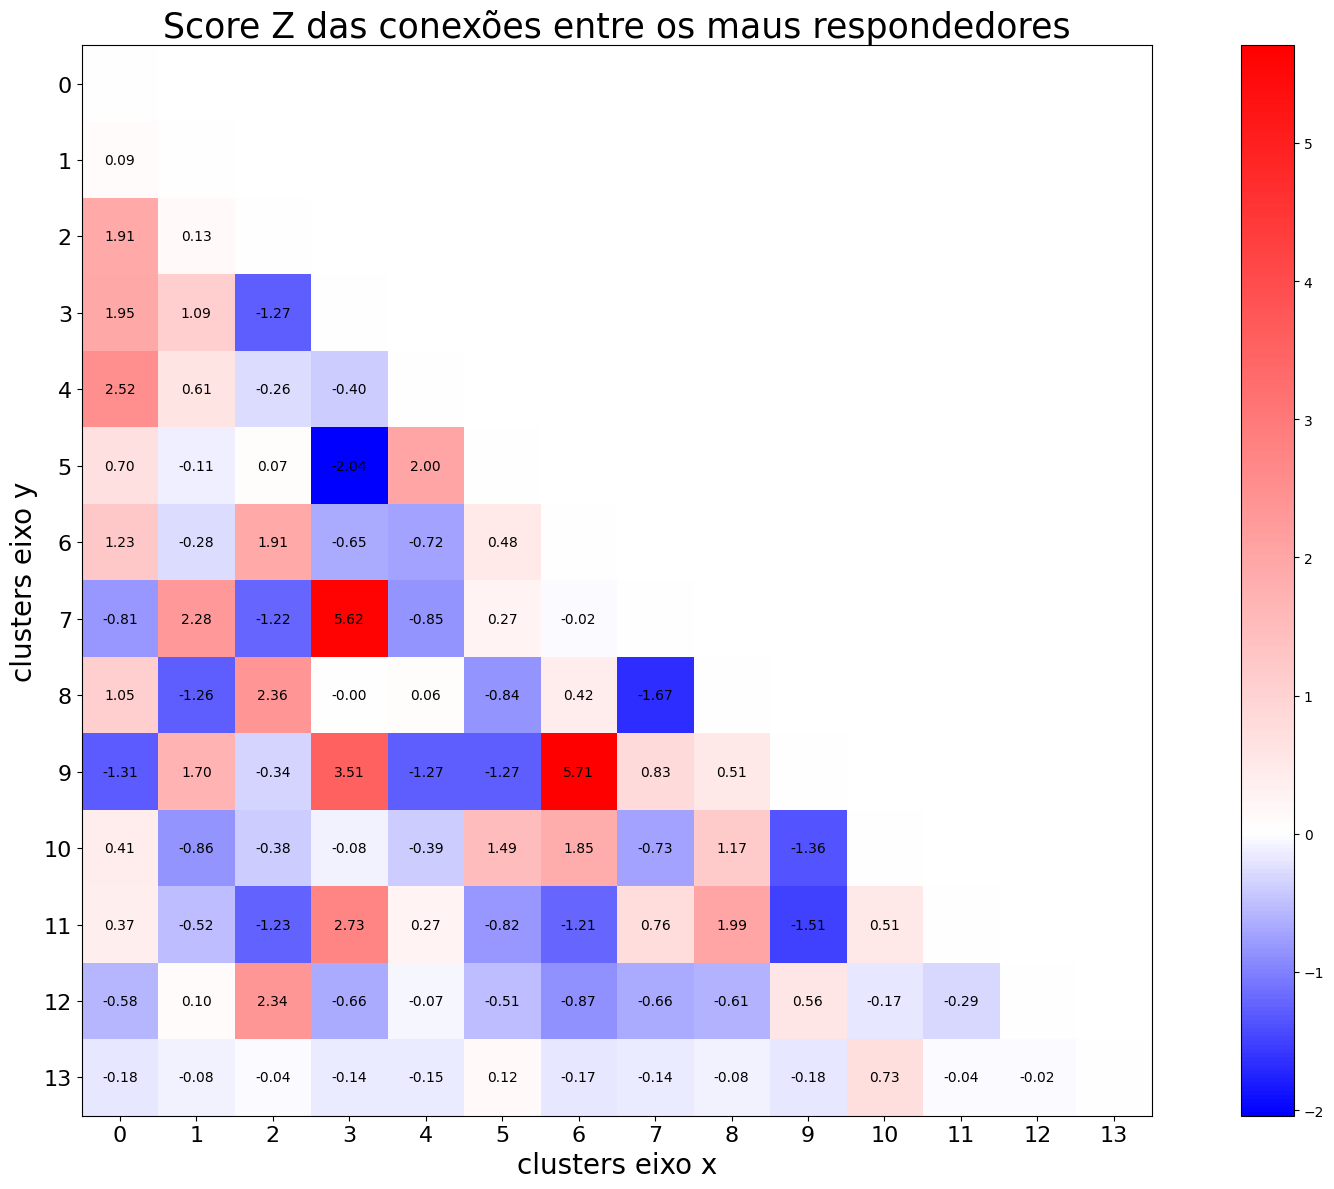

In [7]:
from spatools.plotting.pl import z_score_matrixplot

z_score_matrixplot(adata, show=True,
              title="Score Z das conexões entre os maus respondedores",
              )

In [8]:
samples = adata.uns["zscore_matrix"].keys()

for sample in samples:
    print(sample)

P1_GOR_S2
P2_GOR_S2
P3_GOR_S2
P4_GOR_S1
P5_GOR_S1
P6_GOR_S1
P7_GOR_S1
P8_GOR_S1
P9_GOR_S1


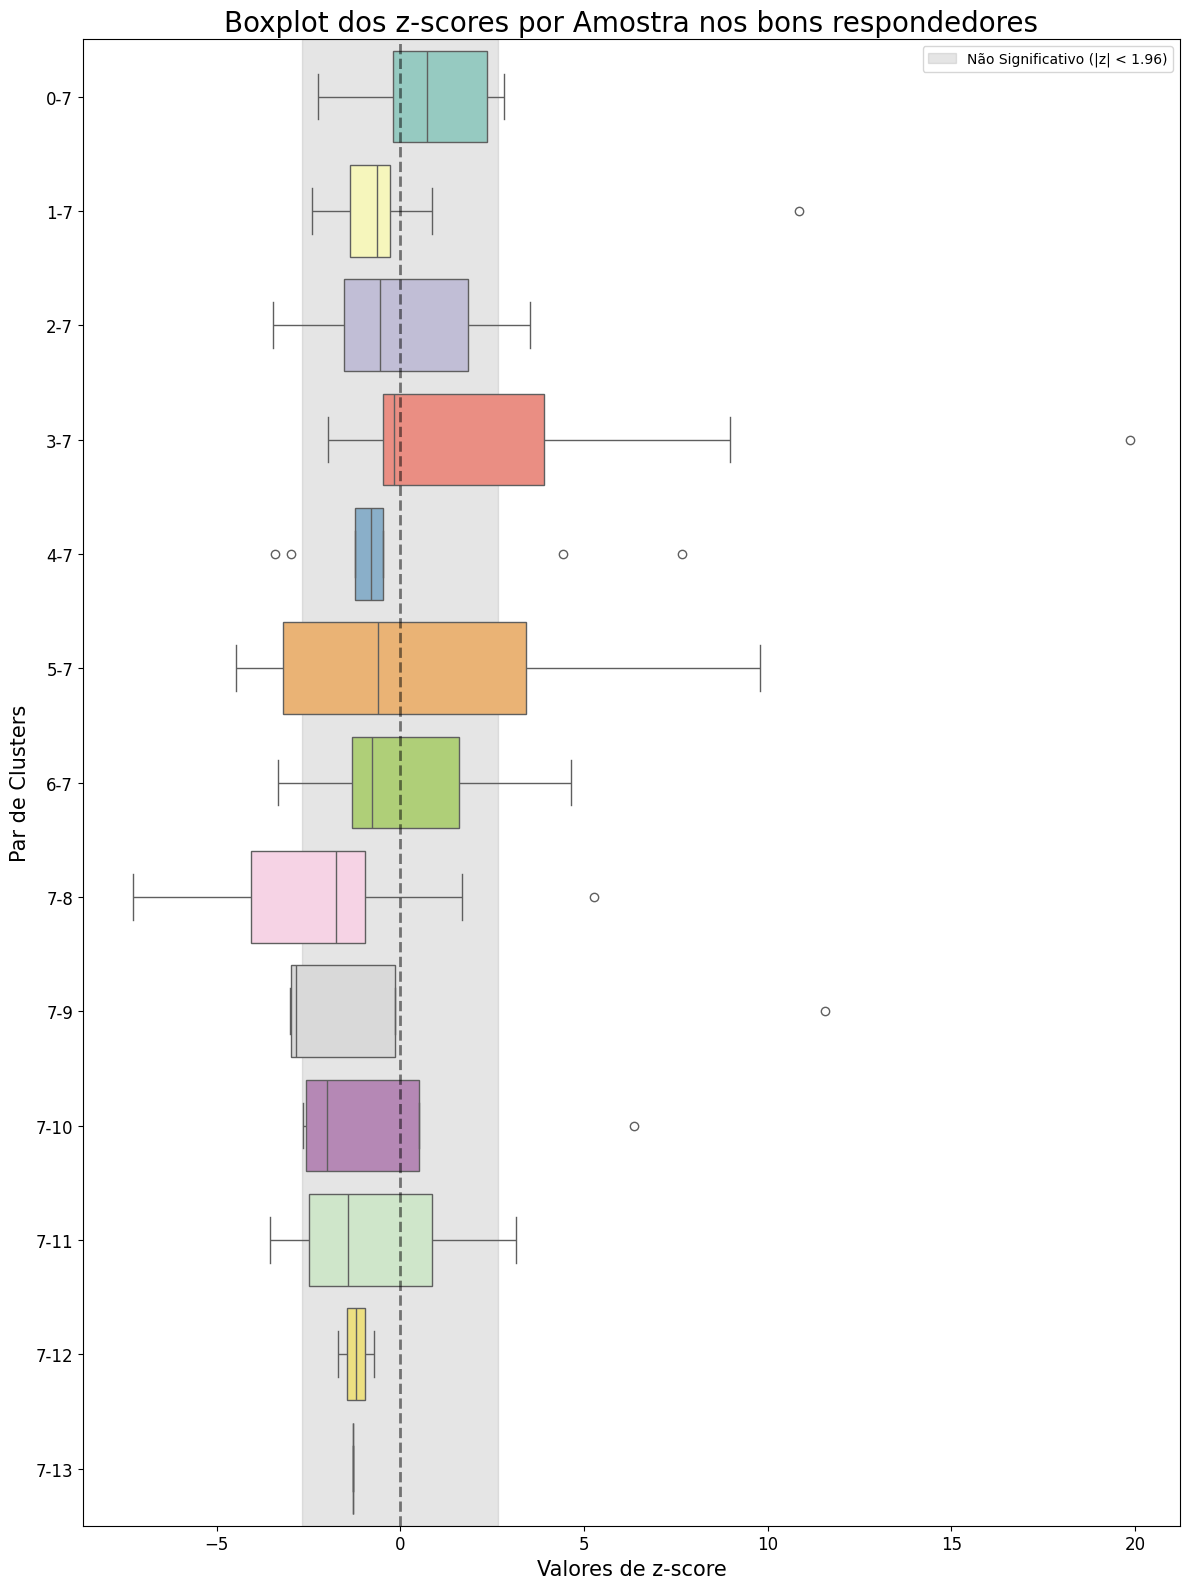

In [9]:
from spatools.plotting.pl import boxplot_cluster_correlations

boxplot_cluster_correlations(adata, cluster_col="clusters_0.6", 
                             show=True, 
                             title="Boxplot dos z-scores por Amostra nos bons respondedores",
                             subset=True,
                             value=7
                             )

In [10]:
adata.uns["significativos"]

,Cluster Pair,Correlation,pval,FDR_pval,significant
0,0-7,2.721361,6.501375e-03,1.713999e-02,True
1,1-7,10.863157,1.726740e-27,5.007546e-26,True
2,2-7,-3.443560,5.741095e-04,2.378454e-03,True
3,3-7,3.904873,9.427484e-05,4.824654e-04,True
4,4-7,-1.243709,2.136068e-01,3.260315e-01,False
...,...,...,...,...,...
82,4-7,7.669219,1.730462e-14,2.509170e-13,True
83,5-7,-3.320521,8.984956e-04,3.126765e-03,True
84,6-7,0.094859,9.244265e-01,9.351757e-01,False
85,7-8,-1.028631,3.036531e-01,4.380913e-01,False
